<a href="https://colab.research.google.com/github/MonsterFinger/git-basics/blob/master/DataSusConvert2csv%26json%26rptfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!rm -rf /content/*

#Download .DBC files from DATASUS, extract them into .DBF an then convert into .CSV and JSON - using Python (data frame)  and Bash.

## Create data directory to store .DBC, .DBF & .CSV files type



In [67]:
#define var file source without the type.
source = 'DORR2016'
source1 = 'DORR2017'
source2 = 'DORR2018'






In [68]:

!mkdir data

## Verify if it has been created

In [69]:
!ls
%cd data

data
/content/data


##Go to data dir and download .dbc file(s) from DATASUS


In [70]:
import shutil
import urllib.request as request
from contextlib import closing

def downloadFile(source):
  url = 'ftp://ftp.datasus.gov.br/dissemin/publicos/SIM/CID10/DORES/'+ source +'.dbc'
  with closing(request.urlopen(url)) as r:
      with open(source +'.dbc', 'wb') as f:
          shutil.copyfileobj(r, f)



In [71]:
downloadFile(source)
downloadFile(source1)
downloadFile(source2)

##Change to content dir

In [72]:
%cd /content/

/content


##Download script dbc2dbf.sh from github
 

In [73]:
!wget https://raw.githubusercontent.com/greatjapa/dbc2csv/4a68def8b24833a5562a2eedf393ac49e9e2a959/dbc2dbf.sh

--2020-11-23 22:54:51--  https://raw.githubusercontent.com/greatjapa/dbc2csv/4a68def8b24833a5562a2eedf393ac49e9e2a959/dbc2dbf.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113 [text/plain]
Saving to: ‘dbc2dbf.sh’

dbc2dbf.sh          100%[===================>]     113  --.-KB/s    in 0s      

2020-11-23 22:54:51 (5.56 MB/s) - ‘dbc2dbf.sh’ saved [113/113]



##Install and import the package dbfread in order to work with dbf file types

In [74]:
!pip install dbfread
from dbfread import DBF

## Go to the root dir (/content in google colab)

In [75]:
%cd /content/

/content


##Download blast-dbf from Git hub

In [76]:
!git clone https://github.com/eaglebh/blast-dbf

Cloning into 'blast-dbf'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


##Run the compiler to create the blast-dbf binary

In [77]:
#!pwd
%cd blast-dbf/
!make blast-dbf

/content/blast-dbf
cc -o blast-dbf blast.c blast-dbf.c


##Change to root dir (/content)

In [78]:
#!pwd
%cd /content


/content


##Run script dbc2dbf which will  generate .dbf files from /content/data/*.dbc

In [79]:
!sh ./dbc2dbf.sh

data/DORR2016.dbc converted to dbf
data/DORR2017.dbc converted to dbf
data/DORR2018.dbc converted to dbf


##Create the following function dbf_to_csv

In [80]:
#Input a dbf, output a csv, same name, same path, except extension
def dbf_to_csv(dbf_table_pth):
    csv_fn = dbf_table_pth[:-4]+ ".csv" #Set the csv file name
    table = DBF(dbf_table_pth)# table variable is a DBF object
    with open(csv_fn, 'w', newline = '') as f:# create a csv file, fill it with dbf content
        writer = csv.writer(f)
        writer.writerow(table.field_names)# write the column name
        for record in table:# write the rows
            writer.writerow(list(record.values()))
    return csv_fn# return the csv name

## Import csv into python 

In [81]:
import csv

##Run the dbf_csv function below

In [82]:

dbf_to_csv('/content/data/'+source+'.dbf')
dbf_to_csv('/content/data/'+source1+'.dbf')
dbf_to_csv('/content/data/'+source2+'.dbf')

'/content/data/DORR2018.csv'

#Now let's generate a .JSON file based on the generated .CSV

## Let's load json and pandas libraries into Python

In [83]:
import json 
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Create the dataframe based the new CSV(s) recently created


In [84]:
df = pd.read_csv (r'/content/data/'+source+'.csv')
df1 = pd.read_csv (r'/content/data/'+source1+'.csv')
df2 = pd.read_csv (r'/content/data/'+source2+'.csv')


##Generate a .JSON file format based on .CSV with DF

In [85]:
df.to_json (r'/content/data/'+source+'.json')
df1.to_json (r'/content/data/'+source1+'.json')
df2.to_json (r'/content/data/'+source2+'.json')

##Now we can use some functions to display the Data Frame(s)

In [101]:
#df.head
#df.columns
#df.tail
#df.size
#df.head
#df.describe
#df.shape
#df["IDADE"]

<bound method NDFrame.head of       CONTADOR  ORIGEM  TIPOBITO  ...  FONTESINF  ALTCAUSA  IDADE_CALC
0            1       1         2  ...        NaN       NaN          20
1            2       1         2  ...        NaN       NaN          80
2            3       1         2  ...        NaN       NaN          60
3            4       1         2  ...        NaN       NaN          67
4            5       1         2  ...        NaN       NaN          36
...        ...     ...       ...  ...        ...       ...         ...
2152      2153       1         2  ...        NaN       NaN          20
2153      2154       1         2  ...        NaN       NaN          76
2154      2155       1         2  ...        NaN       NaN          50
2155      2156       1         2  ...        NaN       NaN         101
2156      2157       1         2  ...        NaN       NaN          86

[2157 rows x 89 columns]>

##Import packages to calculate the age in years and adust empty fields

In [87]:
import datetime
import math

##Create function that does the calculation process

In [88]:
    #Calculate the age

def calcularIdade(dfin):
  dfin["IDADE_CALC"] = ""
  for i in dfin.index :
        if math.isnan(dfin['DTNASC'][i]):
          dfin['IDADE_CALC'][i]=0
          #print()
        else:
          try:
              date_str_n = str(dfin['DTNASC'][i])
              format_str_n = '%d%m%Y.0' # The format
              #print(i)
              datetime_obj_n = datetime.datetime.strptime(date_str_n, format_str_n)
              #print(datetime_obj_n.date())
              date_str_o = str(dfin['DTOBITO'][i])
              format_str_o = '%d%m%Y' # The format
              datetime_obj_o = datetime.datetime.strptime(date_str_o, format_str_o)
              #print(datetime_obj_o.date())
              life_time = datetime_obj_o - datetime_obj_n
              days_in_year = 365.2425
              age = life_time.days
              idade = age/days_in_year
              dfin['IDADE_CALC'][i]=int(idade)
          except:
            dfin['IDADE_CALC'][i]=-1
            #dfin = dfin[dfin["IDADE"]>-1]

##Execute the function to calculate the age in years
 

In [89]:
calcularIdade(df)
calcularIdade(df1)
calcularIdade(df2)


In [90]:
df_obitos_por_idade = df['IDADE_CALC'].value_counts().sort_index()
df_obitos_por_idade1 = df1['IDADE_CALC'].value_counts().sort_index()
df_obitos_por_idade2 = df2['IDADE_CALC'].value_counts().sort_index()


In [91]:
df_obitos_por_idade.head

<bound method NDFrame.head of -1       27
 0      222
 1       28
 2       10
 3       12
       ... 
 100      5
 101      3
 102      2
 104      1
 105      1
Name: IDADE_CALC, Length: 106, dtype: int64>

Text(0, 0.5, 'Numero de obitos')

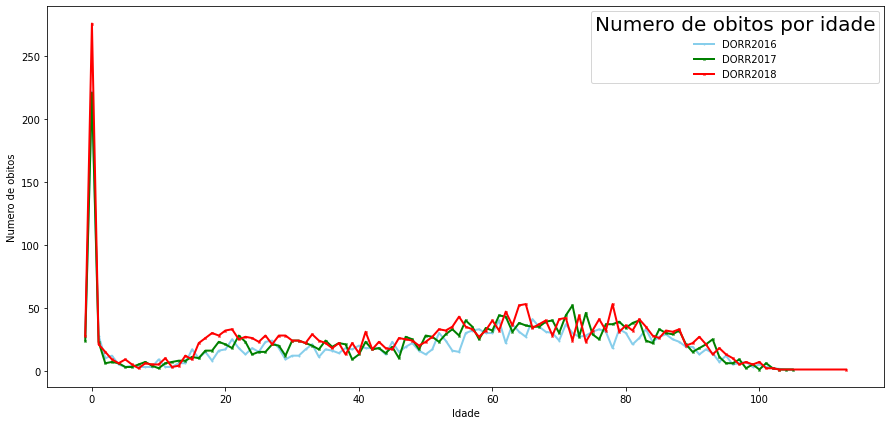

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
df_obitos_por_idade.plot(marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=2, label=source)
df_obitos_por_idade1.plot(marker='x', color='green', markersize=2, linewidth=2, label=source1)
df_obitos_por_idade2.plot(marker='x', color='red', markersize=2, linewidth=2, label=source2)
plt.legend(title = 'Numero de obitos por idade', title_fontsize = '20')
plt.xlabel("Idade")
plt.ylabel("Numero de obitos")

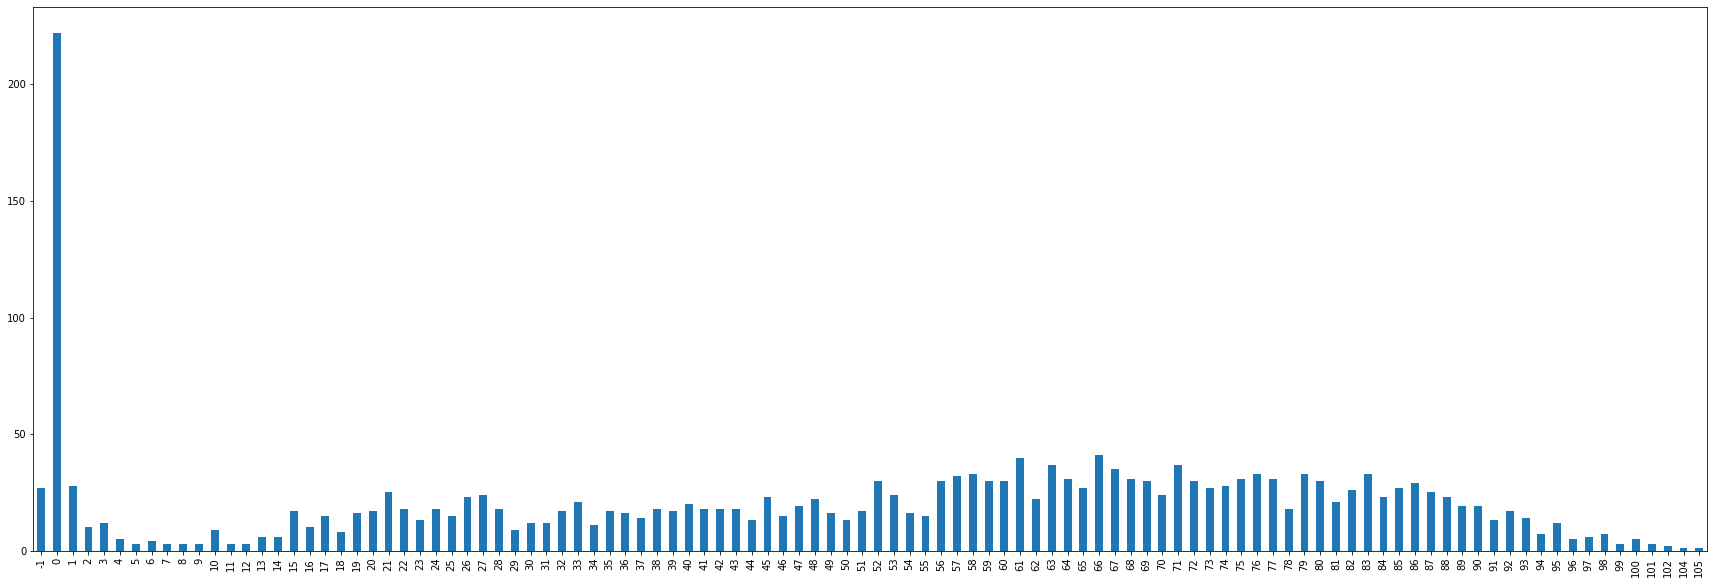

In [93]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,7))
#df.plot(x="idade", y="totalObitos")
df_obitos_por_idade.plot.bar(figsize=(30,10))


#df2.plot(x="idade", y="totalObitos")

#df.plot(marker='o', markerfacecolor='blue', markersize=0, color='skyblue')



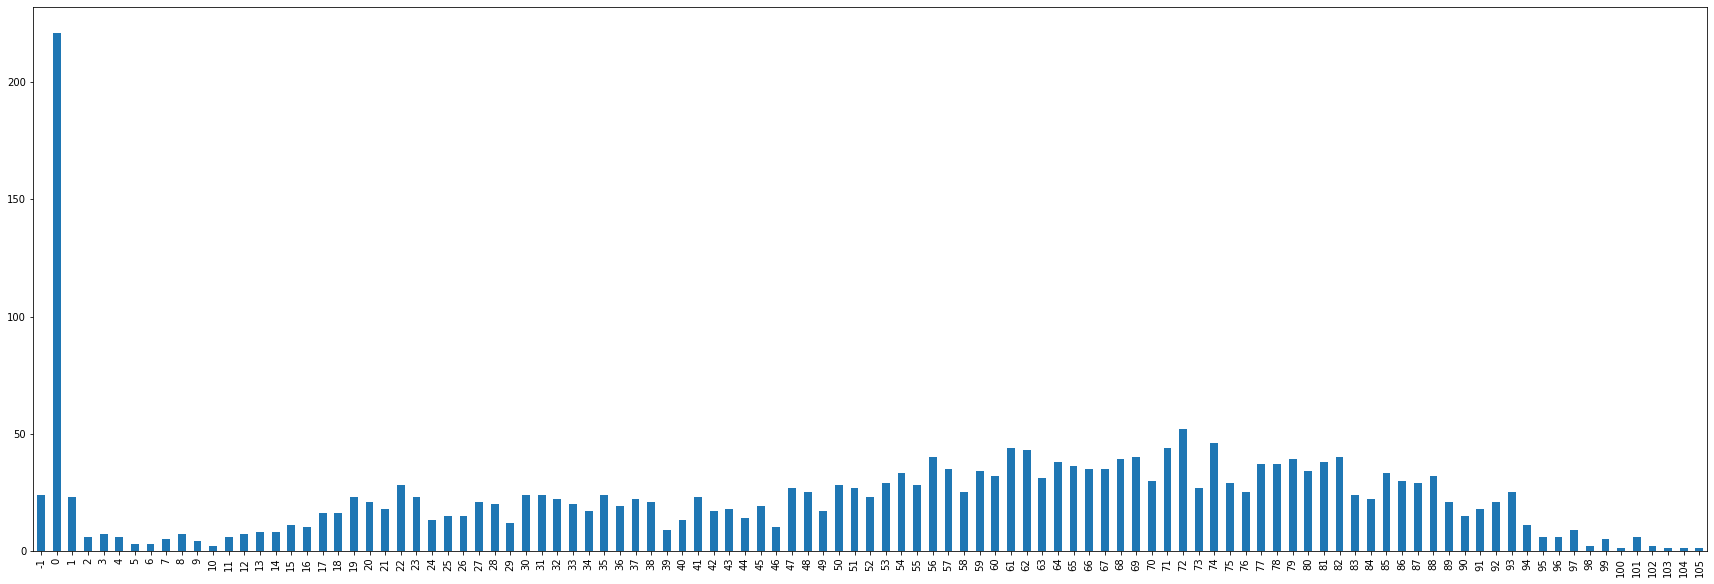

In [94]:
df_obitos_por_idade1.plot.bar(figsize=(30,10))


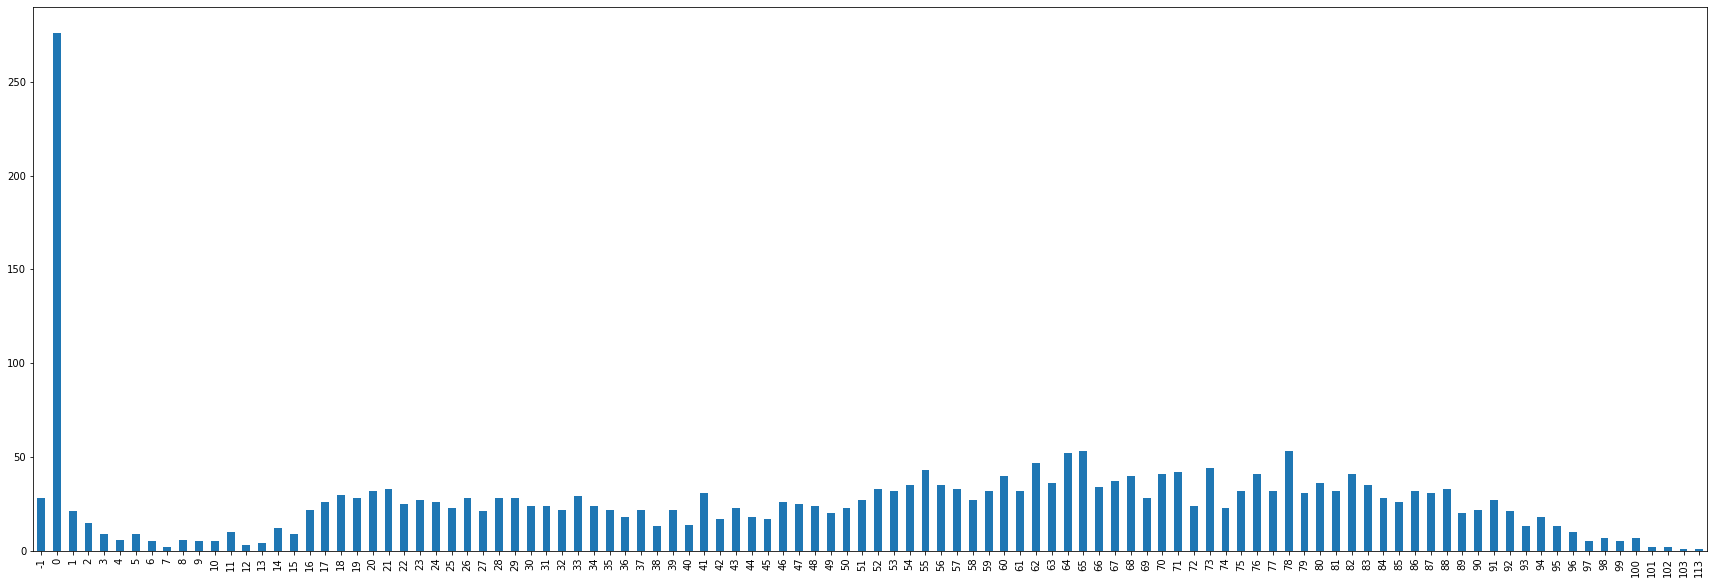

In [95]:
df_obitos_por_idade2.plot.bar(figsize=(30,10))

In [96]:
df_obitos_m = df[df['SEXO']==1]
df_obitos_f = df[df['SEXO']==2]

In [97]:
df_obitos_m['SEXO'].head

<bound method NDFrame.head of 1       1
2       1
4       1
5       1
6       1
       ..
2151    1
2152    1
2153    1
2154    1
2156    1
Name: SEXO, Length: 1353, dtype: int64>

In [98]:
df_obitos_f['SEXO'].head

<bound method NDFrame.head of 0       2
3       2
16      2
22      2
27      2
       ..
2142    2
2144    2
2147    2
2148    2
2155    2
Name: SEXO, Length: 804, dtype: int64>

In [99]:
df_obitos_por_idade_m = df_obitos_m['IDADE_CALC'].value_counts().sort_index()
df_obitos_por_idade_f = df_obitos_f['IDADE_CALC'].value_counts().sort_index()

Text(0, 0.5, 'Numero de obitos')

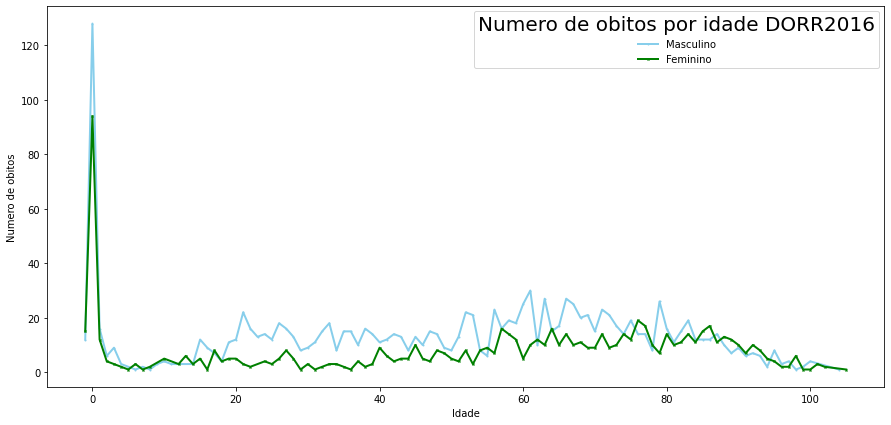

In [100]:
plt.figure(figsize=(15,7))
df_obitos_por_idade_m.plot(marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=2, label='Masculino')
df_obitos_por_idade_f.plot(marker='x', color='green', markersize=2, linewidth=2, label='Feminino')
plt.legend(title = 'Numero de obitos por idade ' + source , title_fontsize = '20')
plt.xlabel("Idade")
plt.ylabel("Numero de obitos")